
##Trabalho realizado por:

- Mário Macedo 25664

- Rodrigo Pilar 26536 PL

# Introdução

O trabalho aborda a solução de problemas de planeamento e escalonamento de tarefas em ambientes restritos, utilizando técnicas de programação computacional avançada. Problemas dessa natureza são comuns em diversas áreas, como engenharia de produção, gestão de projetos e planejamento operacional, onde é necessário organizar atividades interdependentes dentro de um horizonte de tempo limitado, respeitando restrições de precedência e disponibilidade de recursos.

Ao longo deste estudo, foram exploradas diferentes abordagens para resolver esses problemas, como o cálculo do caminho crítico , o uso de algoritmos de otimização baseados em Programação com Restrições e a visualização de resultados por meio de diagramas de Gantt.

Cada abordagem foi implementada com o objetivo de analisar dados de tarefas, gerir restrições, calcular custos e propor soluções que minimizem atrasos e o uso excessivo de recursos.

A implementação combina técnicas computacionais robustas e ferramentas práticas, como a biblioteca constraint e a visualização gráfica em Python, para fornecer uma solução integrada e eficiente ao problema do planeamento de tarefas.







##Implementação

#1º Passo
O comando !pip install python-constraint instala a biblioteca python-constraint, que é uma biblioteca Python utilizada para resolver problemas de satisfação de restrições (Constraint Satisfaction Problems, CSP).



In [ ]:
# Instalar a biblioteca python-constraint
!pip install python-constraint

#2º Passo
O código importa a biblioteca python-constraint, permitindo usar as suas funções para resolver problemas de satisfação de restrições (CSP).

In [ ]:
# Import contraint lybrary
from constraint import *

#3º Passo
O código permite carregar ficheiro no Google Colab e armazena dinamicamente o nome do ficheiro carregar.

In [ ]:
# Carregar o ficheiro
from google.colab import files

uploaded = files.upload()

# Armazenar o nome do ficheiro carregado dinamicamente
file_name = next(iter(uploaded.keys()))


Saving dataset_8.txt to dataset_8 (4).txt


#4º Passo
O código define uma função, parse_dataset, para processar um ficheiro estruturado com diversas seções de dados. São realizadas as seguintes etapas:

1. Abrir e ler o ficheiro: Carrega o conteúdo do ficheiro, linha por linha.

2. Identificar seções: Reconhece seções específicas do ficheiro, como General Information, Projects Summary, e outras, para categorizar os dados.

3. Ignorar linhas irrelevantes: Remove delimitadores, espaços extras e comentários.

4. Extrair dados formatados:

-Informações gerais são guardadas como pares chave-valor.

-Resumos de projetos, relações de precedência, durações, recursos, e disponibilidade de recursos são extraídos e armazenados como listas ou dicionários.

5. Duração por tarefa: Um dicionário separado regista a duração de cada tarefa individual.

6. Chamada e impressão: O ficheiro carregado é processado pela função, e os dados organizados são impressos por seção.

O objetivo é transformar o conteúdo não estruturado do fiheiro em um formato facilmente manipulável para análises ou processamento.

In [ ]:
# Função para processar o ficheiro
def parse_dataset(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data = {}
    section = None

    for line in lines:
        line = line.strip()  # Remover espaços em branco extras

        # Ignorar delimitadores e comentários
        if line.startswith('************************************************************************') or not line:
            continue

        # Identificar a seção atual
        if line == "#General Information":
            section = "general_info"
            data[section] = {}
        elif line == "#Projects summary":
            section = "projects_summary"
            data[section] = []
        elif line == "#Precedence relations":
            section = "precedence_relations"
            data[section] = []
        elif line == "#Duration and resources":
            section = "duration_and_resources"
            if "durations" not in data:  # Inicializa 'durations' apenas se não existir
                data["durations"] = {}
            data[section] = []  # Criar uma lista para armazenar os detalhes de duração e recursos
        elif line == "#Resource availability":
            section = "resource_availability"
            data[section] = {}
        elif section == "general_info":
            if ':' in line:
                key, value = line.split(":", 1)
                data[section][key.strip()] = value.strip()
        elif section == "projects_summary":
            if line.startswith("pronr."):
                continue
            parts = line.split()
            data[section].append({
                "project_number": int(parts[0]),
                "jobs": int(parts[1]),
                "release_date": int(parts[2]),
                "due_date": int(parts[3]),
                "tardiness_cost": int(parts[4]),
                "mpm_time": int(parts[5])
            })
        elif section == "precedence_relations":
            if line.startswith("#jobnr."):
                continue
            parts = line.split()
            data[section].append({
                "job": int(parts[0]),
                "modes": int(parts[1]),
                "successors": [int(x) for x in parts[3:]]
            })
        elif section == "duration_and_resources":
            if line.startswith("#jobnr."):
                continue  # Ignorar o cabeçalho
            parts = line.split()
            job = int(parts[0])
            mode = int(parts[1])
            duration = int(parts[2])
            resources = [int(x) for x in parts[3:]]
            data[section].append({
                "job": job,
                "mode": mode,
                "duration": duration,
                "resources": resources
            })
            data["durations"][job] = duration  # Adicionar a duração ao dicionário de durações

        elif section == "resource_availability":
            if line.startswith("#resource"):
                continue  # Ignorar o cabeçalho
            resource, qty = line.split()
            data[section][resource] = int(qty)  # Adicionar ao dicionário

    return data


# Chamar a função usando o ficheiro carregado
parsed_data = parse_dataset(file_name)

# Imprimir o conteúdo extraído
print("General Information:", parsed_data.get("general_info", {}))
print("Projects Summary:", parsed_data.get("projects_summary", []))
print("Precedence Relations:", parsed_data.get("precedence_relations", []))
print("Duration and Resources:", parsed_data.get("duration_and_resources", []))
print("Resource Availability:", parsed_data.get("resource_availability", {}))

General Information: {'projects': '1', 'jobs (incl. supersource/sink )': '8', 'horizon': '20', '- renewable': '2   R', '- nonrenewable': '0   N', '- doubly constrained': '0   D'}
Projects Summary: [{'project_number': 1, 'jobs': 8, 'release_date': 0, 'due_date': 11, 'tardiness_cost': 0, 'mpm_time': 11}]
Precedence Relations: [{'job': 1, 'modes': 1, 'successors': [2, 3]}, {'job': 2, 'modes': 1, 'successors': [4]}, {'job': 3, 'modes': 1, 'successors': [4]}, {'job': 4, 'modes': 1, 'successors': []}, {'job': 5, 'modes': 1, 'successors': [6, 7]}, {'job': 6, 'modes': 1, 'successors': [8]}, {'job': 7, 'modes': 1, 'successors': [8]}, {'job': 8, 'modes': 1, 'successors': []}]
Duration and Resources: [{'job': 1, 'mode': 1, 'duration': 2, 'resources': [1, 0]}, {'job': 2, 'mode': 1, 'duration': 3, 'resources': [0, 1]}, {'job': 3, 'mode': 1, 'duration': 4, 'resources': [0, 1]}, {'job': 4, 'mode': 1, 'duration': 1, 'resources': [0, 1]}, {'job': 5, 'mode': 1, 'duration': 2, 'resources': [1, 0]}, {'job

#5º Passo
O código extrai e exibe informações organizadas do conjunto de dados já processado pelo parser. Ele realiza as seguintes etapas:

1. Extração de dados:

- Obtém informações gerais, como o número de tarefas (jobs) e o horizonte de tempo (horizon), garantindo que valores numéricos sejam convertidos para inteiros.

- Extrai a lista de recursos disponíveis e suas respectivas quantidades.

- Recupera as relações de precedência e os detalhes de duração e recursos para cada tarefa.

2. Estruturação e exibição:

- Imprime as informações gerais, incluindo o número de tarefas e o horizonte de tempo.

- Mostra a lista de recursos e sua disponibilidade.

- Detalha as relações de precedência, indicando sucessores para cada tarefa.

- Exibe a duração e os recursos necessários para cada tarefa de forma clara.

3. Objetivo:

- Facilitar a visualização e análise dos dados processados, organizando informações essenciais para uso posterior em aplicações como planejamento ou otimização.

O foco é fornecer um panorama detalhado dos elementos do problema baseado nos dados do ficheiro.

In [ ]:
# Extrair dados do parser
general_info = parsed_data["general_info"]  # A chave correta é "general_info" em vez de "General Information"
jobs = int(general_info.get("jobs (incl. supersource/sink )", 0))  # Número de jobs
horizon = int(general_info.get("horizon", 0))  # Horizonte de tempo, garantir que seja convertido para inteiro

resources = list(parsed_data["resource_availability"].keys())  # Lista de recursos
resource_availability = parsed_data["resource_availability"]  # Disponibilidade de recursos

precedence_relations = parsed_data["precedence_relations"]  # Relações de precedência
duration_and_resources = parsed_data["duration_and_resources"]  # Duração e recursos

#
# Prints para exibir as informações extraídas
print("### Informações Gerais ###")
print(f"Número de jobs (incluindo supersource/sink): {jobs}")
print(f"Horizonte de tempo: {horizon}\n")

print("### Recursos ###")
print(f"Lista de recursos: {', '.join(resources)}")
print("Disponibilidade de recursos:")
for resource, availability in resource_availability.items():
    print(f"{resource}: {availability} unidades")

print("\n### Relações de Precedência ###")
print("As relações de precedência indicam os sucessores de cada job:\n")
for relation in precedence_relations:
    job = relation["job"]
    successors = relation["successors"]
    print(f"Job {job}: Sucessores → {successors}")

print("\n### Duração e Recursos Necessários ###")
print("Informações sobre a duração e os recursos utilizados por cada job:\n")
for entry in duration_and_resources:
    job = entry["job"]
    duration = entry["duration"]
    resources = entry["resources"]
    print(f"Job {job}: Duração → {duration} | Recursos → {resources}")

### Informações Gerais ###
Número de jobs (incluindo supersource/sink): 8
Horizonte de tempo: 20

### Recursos ###
Lista de recursos: R1, R2
Disponibilidade de recursos:
R1: 1 unidades
R2: 2 unidades

### Relações de Precedência ###
As relações de precedência indicam os sucessores de cada job:

Job 1: Sucessores → [2, 3]
Job 2: Sucessores → [4]
Job 3: Sucessores → [4]
Job 4: Sucessores → []
Job 5: Sucessores → [6, 7]
Job 6: Sucessores → [8]
Job 7: Sucessores → [8]
Job 8: Sucessores → []

### Duração e Recursos Necessários ###
Informações sobre a duração e os recursos utilizados por cada job:

Job 1: Duração → 2 | Recursos → [1, 0]
Job 2: Duração → 3 | Recursos → [0, 1]
Job 3: Duração → 4 | Recursos → [0, 1]
Job 4: Duração → 1 | Recursos → [0, 1]
Job 5: Duração → 2 | Recursos → [1, 0]
Job 6: Duração → 3 | Recursos → [0, 1]
Job 7: Duração → 4 | Recursos → [0, 1]
Job 8: Duração → 1 | Recursos → [0, 1]


#6º Passo
O código utiliza a biblioteca python-constraint para modelar e resolver um problema de planejamento com restrições de precedência e disponibilidade de recursos. Ele realiza as seguintes etapas:

1. Configuração do Problema

- Cria uma instância do problema (Problem()) para adicionar e gerenciar restrições.

2. Restrições de Precedência

Para cada relação de precedência:

- Determina que um job deve terminar antes de seu sucessor começar, levando em consideração a duração do job.

- Adiciona essa regra ao problema como uma restrição personalizada, usando identificadores de início (start_job, start_successor) para representar os tempos de início dos jobs.

3. Verificação de Disponibilidade de Recursos

- Garante que os dados de disponibilidade de recursos estão presentes no conjunto de dados processados. Caso contrário, lança um erro.

4. Restrições de Recursos

Para cada recurso disponível:

- Define uma restrição para limitar o uso total do recurso em qualquer momento do horizonte de planejamento.

- Calcula o consumo de cada recurso para cada job ao longo de sua duração.

- Verifica que o consumo em cada unidade de tempo não exceda a disponibilidade máxima do recurso.

5. Adição de Restrições ao Problema

- Vincula essas restrições ao início de todos os jobs, garantindo que sejam respeitadas durante a solução do problema.

Objetivo do Código

O objetivo é modelar um problema de agendamento onde:

- Cada job é executado respeitando as relações de precedência.

- O consumo de recursos é limitado pela disponibilidade em cada unidade de tempo.

Esse modelo é base para resolver problemas complexos de planejamento ou otimização, como escalonamento de tarefas em projetos.

In [ ]:
from constraint import Problem

problem = Problem()

# Adicionar restrições de precedência
print("### Restrições de Precedência ###")
for relation in precedence_relations:
    job = relation["job"]
    successors = relation["successors"]
    duration = next(entry["duration"] for entry in duration_and_resources if entry["job"] == job)

    for successor in successors:
        print(f"Job {job} deve terminar antes de Job {successor} começar.")
        # Passando a duração corretamente como argumento fixado
        problem.addConstraint(
            lambda start_job, start_successor, dur=duration: start_successor >= start_job + dur,
            (f"start_{job}", f"start_{successor}")
        )

# Verificar se "resource_availability" está presente em parsed_data
if "resource_availability" not in parsed_data:
    raise ValueError("Erro: 'resource_availability' não encontrado em parsed_data. Verifique a função parse_dataset.")

# Restrições de recursos
print("### Restrições de Recursos ###")
for resource_name, max_availability in parsed_data["resource_availability"].items():
    print(f"Recurso {resource_name}: Disponibilidade máxima → {max_availability}")

    # Função de restrição para os recursos
    def resource_constraint(*job_starts, durations=parsed_data["durations"], resource_name=resource_name):
        usage_per_time = [0] * (parsed_data["horizon"] + 1)  # Garantir que o uso seja calculado para todo o horizonte de tempo

        # Para cada job, calcular o uso do recurso
        for job_start in job_starts:
            if job_start is None:
                continue

            # Encontrar o job e sua duração
            job_index = job_starts.index(job_start)  # Indice do job, considerando que 'job_starts' começa do 0
            job = job_index + 1  # Ajustar o job para começar do 1
            job_duration = durations.get(job, 0)  # Duração do job
            job_usage = parsed_data["duration_and_resources"][job_index]["resources"]

            # Encontrar o uso de cada recurso
            resource_index = list(parsed_data["resource_availability"].keys()).index(resource_name)
            resource_usage = job_usage[resource_index]  # Recurso utilizado pelo job

            # Atualizar a lista de uso do recurso no horizonte de tempo
            for t in range(job_start, job_start + job_duration):
                if t <= parsed_data["horizon"]:  # Não ultrapassar o horizonte de tempo
                    usage_per_time[t] += resource_usage

        # Garantir que o uso de recursos em cada tempo não exceda a disponibilidade
        return all(usage <= max_availability for usage in usage_per_time)

    # Adicionar a restrição de recursos para todos os jobs
    problem.addConstraint(
        resource_constraint,
        [f"start_{job}" for job in range(1, jobs + 1)]  # Garantir que o intervalo de jobs seja correto
    )

### Restrições de Precedência ###
Job 1 deve terminar antes de Job 2 começar.
Job 1 deve terminar antes de Job 3 começar.
Job 2 deve terminar antes de Job 4 começar.
Job 3 deve terminar antes de Job 4 começar.
Job 5 deve terminar antes de Job 6 começar.
Job 5 deve terminar antes de Job 7 começar.
Job 6 deve terminar antes de Job 8 começar.
Job 7 deve terminar antes de Job 8 começar.
### Restrições de Recursos ###
Recurso R1: Disponibilidade máxima → 1
Recurso R2: Disponibilidade máxima → 2


#7º Passo
O código realiza o processamento de dados de um ficheiro de projeto e calcula os domínios de início e término dos jobs baseando-se em restrições de precedência e duração. As etapas principais são:

1. Leitura do ficheiro

- O conteúdo do ficheiro é lido e armazenado em uma variável.

2. Função parse_dataset_from_content

Processa o conteúdo do ficheiro para extrair:

- Relações de precedência: Identifica os jobs e seus sucessores, armazenando em um dicionário.

- Durações: Registra a duração de cada job.

- Horizonte de tempo: Obtém o valor total do horizonte definido no ficheiro.

- Os dados são organizados em um dicionário para fácil acesso.

3. Função calculate_domains

Calcula os domínios de início mais cedo (earliest start) e término mais tarde (latest finish) de cada job, considerando:

- Restrições de predecessores (jobs que devem ser concluídos antes de outro começar).

- Restrições de sucessores (jobs que dependem do término do job atual para iniciar).

O cálculo utiliza:
- Início mais cedo: O maior início mais cedo dos predecessores somado à sua duração.

- Término mais tarde: O menor término mais tarde dos sucessores menos a duração do job atual.

4. Execução

- Os dados do ficheiro são analisados usando parse_dataset_from_content.

- Os domínios calculados são exibidos, mostrando os intervalos de tempo possíveis para início e término de cada job.

Objetivo

Fornecer uma análise detalhada das restrições de tempo para cada job em um projeto, considerando relações de precedência e o horizonte de planejamento. Isso é útil para planejamento e escalonamento eficientes.








In [ ]:
# Abrir e ler o conteúdo do ficheiro carregado
with open(file_name, 'r') as f:
    file_content = f.read()


def parse_dataset_from_content(content):
    data = {}
    try:
        lines = content.splitlines()

        # Extração de Precedence Relations
        start_precedence = lines.index("#Precedence relations") + 2
        end_precedence = lines.index("************************************************************************", start_precedence)

        precedence_relations = {}
        for line in lines[start_precedence:end_precedence]:
            parts = list(map(int, line.split()))
            job = parts[0]
            successors = parts[3:]  # Sucessores começam na 4ª posição
            precedence_relations[job] = successors

        # Extração de Durations
        start_duration = lines.index("#Duration and resources") + 2
        end_duration = lines.index("************************************************************************", start_duration)

        durations = {}
        for line in lines[start_duration:end_duration]:
            parts = list(map(int, line.split()))
            job, mode, duration = parts[:3]
            durations[job] = duration

        # Obtendo o horizonte
        horizon_line = next(line for line in lines if line.startswith("horizon"))
        horizon = int(horizon_line.split(":")[1].strip())

        data["precedence_relations"] = precedence_relations
        data["durations"] = durations
        data["horizon"] = horizon

    except Exception as e:
        print(f"Erro ao analisar o conteúdo: {e}")

    return data

def calculate_domains(parsed_data):
    # Obtendo os dados de precedência do ficheiro processado
    precedence = parsed_data.get("precedence_relations", {})

    # Lista de todos os jobs
    jobs = precedence.keys()

    # Inicializando os domínios
    domains = {job: {"earliest_start": 0, "latest_finish": float("inf")} for job in jobs}

    # Calculando o earliest_start
    for job in jobs:
        predecessors = [
            pred_job for pred_job, successors in precedence.items() if job in successors
        ]
        if not predecessors:  # Sem predecessores
            domains[job]["earliest_start"] = 0
        else:
            domains[job]["earliest_start"] = max(
                domains[pred]["earliest_start"] + parsed_data["durations"].get(pred, 0)
                for pred in predecessors
            )

    # Calculando o latest_finish
    for job in reversed(list(jobs)):
        successors = precedence.get(job, [])
        if not successors:  # Sem sucessores
            domains[job]["latest_finish"] = parsed_data["horizon"]
        else:
            domains[job]["latest_finish"] = min(
                domains[succ]["latest_finish"] - parsed_data["durations"].get(job, 0)
                for succ in successors
            )

    return domains

parsed_data = parse_dataset_from_content(file_content)
if parsed_data:
    # Calculando os domínios
    domains = calculate_domains(parsed_data)
    print("Domínios calculados:")
    for job, domain in domains.items():
        print(f"Job {job}: Início mais cedo = {domain['earliest_start']}, Término mais tarde = {domain['latest_finish']}")
else:
    print("Erro: não foi possível analisar os dados do ficheiro.")


Domínios calculados:
Job 1: Início mais cedo = 0, Término mais tarde = 14
Job 2: Início mais cedo = 2, Término mais tarde = 17
Job 3: Início mais cedo = 2, Término mais tarde = 16
Job 4: Início mais cedo = 6, Término mais tarde = 20
Job 5: Início mais cedo = 0, Término mais tarde = 14
Job 6: Início mais cedo = 2, Término mais tarde = 17
Job 7: Início mais cedo = 2, Término mais tarde = 16
Job 8: Início mais cedo = 6, Término mais tarde = 20


#8º Passo
O código abaixo resolve um problema de escalonamento de tarefas com restrições de precedência e recursos usando a biblioteca constraint para Programação com Restrições (CSP).
É calculado os tempos de início de cada tarefa, respeitando precedências e a disponibilidade de recursos, e exibe uma solução, caso exista. A explicação é estruturada por partes.

1. Configuração Inicial

Define o problema e as variáveis do CSP:

Entrada:

duration_and_resources:

- Lista com dados de duração e uso de recursos por tarefa.

precedence_relations:
- Relações de precedência entre tarefas.

resource_availability:
- Disponibilidade de recursos por unidade de tempo.

horizon:
- Horizonte de tempo máximo.

Variáveis

- Cada tarefa recebe uma variável representando seu tempo de início (start_<job_id>), com domínio de valores de 0 até horizon.


2. Restrições de Precedência

Para garantir que uma tarefa só comece após a conclusão de seus predecessores:

Cada relação de precedência define que:

**START**successor ≥ **START**job + **DURATION**job

Usa lambda para capturar a duração de forma dinâmica.

3. Restrições de Recursos

Garante que a soma do uso de cada recurso ao longo do tempo não exceda sua capacidade

Para cada recurso:

- Identifica as tarefas que o utilizam.

- Verifica o uso de recursos ao longo do tempo com base nos tempos de início e duração das tarefas.

Função de Restrição

- A função percorre o timeline (linha do tempo do recurso), acumulando o uso para cada tarefa ativa no instante t. Retorna False se exceder a capacidade.

4. Resolução

Usa problem.getSolution() para buscar uma solução viável.

Tempos de Execução:

- Mede a duração do processo.

Exibição da Solução:

- Imprime os tempos de início e término de cada tarefa, ordenados pelo ID da tarefa.


In [ ]:
from constraint import Problem
from time import time

# Configurar o problema de restrições
problem = Problem()

# Adicionar variáveis para os tempos de início dos jobs
for job_data in duration_and_resources:
    job_id = job_data['job']
    problem.addVariable(f"start_{job_id}", range(0, horizon + 1))

# Adicionar restrições de precedência
for relation in precedence_relations:
    job = relation['job']
    successors = relation['successors']
    duration = next(d['duration'] for d in duration_and_resources if d['job'] == job)
    for successor in successors:
        # Usar uma função lambda para garantir que a duração seja capturada corretamente
        problem.addConstraint(
            lambda start1, start2, d=duration: start1 + d <= start2,
            (f"start_{job}", f"start_{successor}")
        )

# Restrições de recursos
for resource, capacity in resource_availability.items():
    jobs_using_resource = [
        (job_data['job'], job_data['resources'][r_idx], job_data['duration'])
        for job_data in duration_and_resources
        for r_idx in range(len(job_data['resources']))
        if resources[r_idx] == resource
    ]

    def resource_constraint(*job_starts):
        timeline = [0] * (horizon + 1)

        for (job_id, usage, job_duration), start_time in zip(jobs_using_resource, job_starts):
            # Para cada job, computamos a alocação do recurso no timeline
            for t in range(start_time, start_time + job_duration):
                if t >= len(timeline):  # Evitar ultrapassar o horizonte
                    return False
                timeline[t] += usage
                if timeline[t] > capacity:
                    return False
        return True

    # Adiciona a restrição de recursos para cada job que usa esse recurso
    problem.addConstraint(resource_constraint, [f"start_{job}" for job, _, _ in jobs_using_resource])

# Resolver o problema e buscar a primeira solução
start_time = time()
solution = problem.getSolution()  # Obter apenas a primeira solução encontrada
end_time = time()

# Mostrar resultados
print(f"Tempo de execução: {end_time - start_time:.2f} segundos")
if solution:
    print("Solução encontrada:")
    for job, start in sorted(solution.items(), key=lambda x: int(x[0].split("_")[1])):
        job_id = int(job.split("_")[1])  # Extrair o ID do job
        duration = next(d['duration'] for d in duration_and_resources if d['job'] == job_id)
        end_time = start + duration
        print(f"  Job {job_id}: Começa no tempo {start}, Duração = {duration}, Termina no tempo {end_time}")
else:
    print("Nenhuma solução encontrada.")

Tempo de execução: 0.00 segundos
Solução encontrada:
  Job 1: Começa no tempo 14, Duração = 2, Termina no tempo 16
  Job 2: Começa no tempo 16, Duração = 3, Termina no tempo 19
  Job 3: Começa no tempo 16, Duração = 4, Termina no tempo 20
  Job 4: Começa no tempo 20, Duração = 1, Termina no tempo 21
  Job 5: Começa no tempo 14, Duração = 2, Termina no tempo 16
  Job 6: Começa no tempo 16, Duração = 3, Termina no tempo 19
  Job 7: Começa no tempo 16, Duração = 4, Termina no tempo 20
  Job 8: Começa no tempo 20, Duração = 1, Termina no tempo 21


#10º Passo
O código abaixo é uma implementação de um sistema que analisa um ficheiro de entrada com informações sobre tarefas, precedências, durações e recursos, calcula o caminho crítico e gera um diagrama de Gantt.

A seguir, está uma explicação detalhada de cada parte:

1. Função processar_arquivo

Extrai informações do ficheiro para criar um conjunto de dados estruturado:

- Entrada: Nome do ficheiro.

- Saída: Dados das tarefas, precedências, durações, recursos e disponibilidades.

Funcionalidades

- Lê o ficheiro linha por linha.

- Identifica e armazena informações com base nas seções (#Precedence relations, #Duration and resources, etc.).

- Ignora linhas irrelevantes (linhas vazias ou separadores).

- Converte valores relevantes em tipos apropriados (int para números, por exemplo).

2. Função calcular_caminho_critico

Calcula o caminho crítico usando o método de análise de rede de projetos:

Entrada:

- Dados de precedências e durações.
Saída:

-  Tempos de início e término para cada tarefa.

- O caminho crítico (tarefas com folga zero).

Funcionalidades

- Calcula os tempos mais cedo (tempos_inicio) e mais tarde (tempos_mais_tarde) para todas as tarefas.

- Determina a folga de cada tarefa como a diferença entre os tempos mais tarde e mais cedo.

- Identifica tarefas críticas (aquelas com folga zero) e organiza-as na ordem correta.

3. Função gerar_diagrama_gantt_com_caminho_critico

Gera um diagrama de Gantt destacando as tarefas do caminho crítico:

Entrada:

- Tempos de início, tempos de término e o caminho crítico.

Saída:
- Exibição de um gráfico de Gantt.

Funcionalidades

- Cria barras horizontais para representar a duração das tarefas.

- Destaca tarefas críticas em vermelho e não críticas em azul claro.

- Configura e exibe o gráfico com título, eixos rotulados e grade.

4. Execução

- O ficheiro de entrada é processado para extrair as informações estruturadas.

- O caminho crítico é calculado com base nos dados de precedência e duração.

- O gráfico de Gantt é gerado para visualizar a programação e o caminho crítico.

Tempos de início das tarefas: {1: 0, 2: 2, 3: 2, 4: 6, 5: 0, 6: 2, 7: 2, 8: 6}
Tempos de fim das tarefas: {1: 2, 2: 5, 3: 6, 4: 7, 5: 2, 6: 5, 7: 6, 8: 7}
Caminho Crítico: [1, 5, 3, 7, 4, 8]


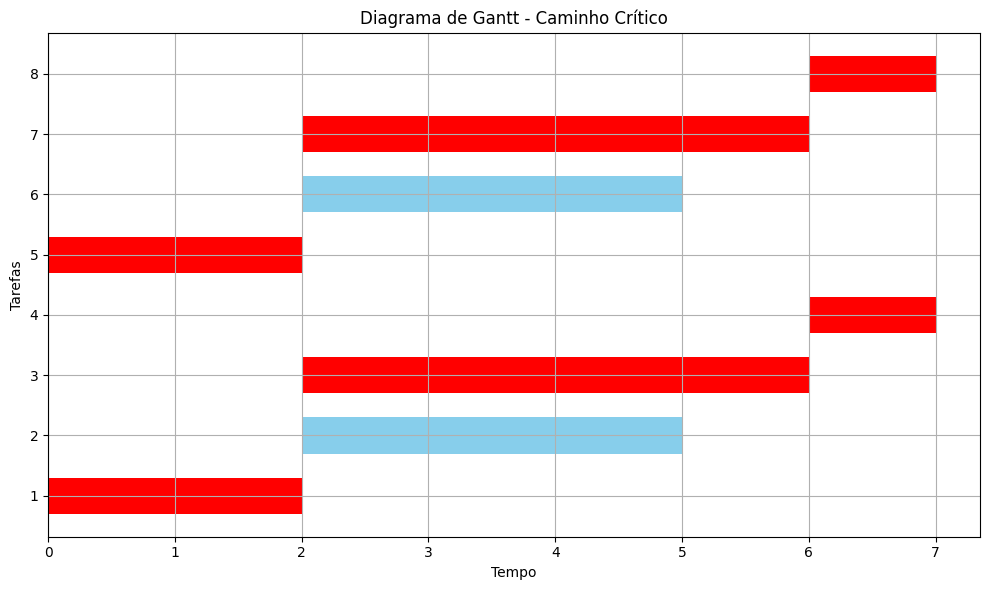

In [ ]:
import matplotlib.pyplot as plt  # Importando a biblioteca necessária para o gráfico

# Função para processar o ficheiro e extrair as informações relevantes
def processar_arquivo(file_name):
    with open(file_name, 'r') as f:
        lines = f.readlines()

    # Inicializando variáveis
    tarefas = {}
    precedencias = {}
    duracoes = {}
    recursos = {}
    disponibilidades = {}

    # Processando as seções do ficheiro
    in_precedence = False
    in_duration = False
    in_resources = False

    for line in lines:
        # Ignorar linhas de separação (com asteriscos)
        if line.strip() == '' or line.startswith('************************************************************************'):
            continue

        # Captura das precedências
        if "#Precedence relations" in line:
            in_precedence = True
            continue
        if "#Duration and resources" in line:
            in_duration = True
            in_precedence = False
            continue
        if "#Resource availability" in line:
            in_resources = True
            in_duration = False
            continue

        # Captura das precedências
        if in_precedence and line.strip() and not line.startswith("#"):
            parts = line.split()
            try:
                jobnr = int(parts[0])  # Tenta converter o jobnr para inteiro
                successors = list(map(int, parts[3:]))  # Tenta pegar os sucessores a partir da 4ª posição
                precedencias[jobnr] = successors
            except ValueError:
                pass  # Se houver algum erro ao converter, ignora a linha

        # Captura das durações
        if in_duration and line.strip() and not line.startswith("#"):
            parts = line.split()
            try:
                jobnr = int(parts[0])  # Tenta converter o jobnr para inteiro
                duration = int(parts[2])  # Tenta pegar a duração na posição 3
                duracoes[jobnr] = duration
            except ValueError:
                pass  # Se houver erro ao converter, ignora a linha

        # Captura das disponibilidades de recursos
        if in_resources and line.strip() and not line.startswith("#"):
            parts = line.split()
            resource = parts[0]
            try:
                qty = int(parts[1])  # Tenta pegar a quantidade de recurso
                recursos[resource] = qty
                disponibilidades[resource] = qty  # Supondo que disponibilidade seja igual à quantidade
            except ValueError:
                pass  # Se houver erro ao converter, ignora a linha

    return tarefas, precedencias, duracoes, recursos, disponibilidades

# Função para calcular o caminho crítico
def calcular_caminho_critico(precedencias, duracoes):
    # Inicializando variáveis para armazenar os tempos de início e fim
    tempos_inicio = {job: 0 for job in duracoes}
    tempos_fim = {job: duracoes[job] for job in duracoes}

    # Calcular o tempo de início e fim das tarefas
    for job in duracoes:
        if job in precedencias:
            for successor in precedencias[job]:
                tempos_inicio[successor] = max(tempos_inicio[successor], tempos_fim[job])
                tempos_fim[successor] = tempos_inicio[successor] + duracoes[successor]

    # Calcular os tempos de término mais tarde
    tempos_mais_tarde = {job: tempos_fim[max(tempos_fim, key=tempos_fim.get)] for job in duracoes}

    for job in reversed(sorted(duracoes)):
        if job in precedencias:
            for successor in precedencias[job]:
                tempos_mais_tarde[job] = min(tempos_mais_tarde[job], tempos_mais_tarde[successor] - duracoes[successor])

    # Calculando a folga de cada tarefa
    folga = {job: tempos_mais_tarde[job] - tempos_fim[job] for job in duracoes}

    # Identificando o caminho crítico (todas as tarefas com folga zero)
    caminho_critico = [job for job in duracoes if folga[job] == 0]

    # Ordenando o caminho crítico para garantir a ordem das tarefas
    caminho_critico.sort(key=lambda x: tempos_inicio[x])

    return tempos_inicio, tempos_fim, caminho_critico

# Função para gerar o diagrama de Gantt com destaque para o caminho crítico
def gerar_diagrama_gantt_com_caminho_critico(tempos_inicio, tempos_fim, caminho_critico):
    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Adicionar as barras para cada tarefa
    for job, inicio in tempos_inicio.items():
        fim = tempos_fim[job]
        # Verifica se a tarefa está no caminho crítico
        if job in caminho_critico:
            color = 'red'  # Tarefas críticas em vermelho
        else:
            color = 'skyblue'  # Outras tarefas em azul claro
        ax.barh(job, fim - inicio, left=inicio, height=0.6, align='center', color=color)

    ax.set_xlabel('Tempo')
    ax.set_ylabel('Tarefas')
    ax.set_title('Diagrama de Gantt - Caminho Crítico')
    ax.grid(True)

    # Mostrando o gráfico
    plt.tight_layout()
    plt.show()

# Processar o ficheiro
tarefas, precedencias, duracoes, recursos, disponibilidades = processar_arquivo(file_name)

# Calcular o caminho crítico
tempos_inicio, tempos_fim, caminho_critico = calcular_caminho_critico(precedencias, duracoes)

# Exibir resultados
print("Tempos de início das tarefas:", tempos_inicio)
print("Tempos de fim das tarefas:", tempos_fim)
print("Caminho Crítico:", caminho_critico)

# Gerar o diagrama de Gantt destacando o caminho crítico
gerar_diagrama_gantt_com_caminho_critico(tempos_inicio, tempos_fim, caminho_critico)


# Conclusão

O trabalho realizado demonstrou a eficácia de diferentes abordagens computacionais na solução de problemas complexos de escalonamento de tarefas.

A análise do caminho crítico permitiu identificar atividades críticas e não-críticas.

A utilização de Programação com Restrições provou ser uma técnica poderosa para integrar múltiplas restrições, como precedência entre tarefas e capacidade limitada de recursos, resultando em soluções otimizadas que atendem às especificações do problema.

Além disso, a visualização dos resultados por meio de diagramas de Gantt destacou-se como uma ferramenta essencial para interpretar os dados e validar as soluções propostas, permitindo uma comunicação clara das informações.

Este estudo demonstra a versatilidade e aplicabilidade de métodos computacionais no contexto do planeamento e gestão de projetos.

Dessa forma, este trabalho contribui tanto para o avanço técnico quanto para o entendimento prático de como otimizar processos de planeamento e definição de recursos.